# ARIMA
Here, seasonality can again be used. Regular ARIMA model will predcit a single point forecast for the entire horizon, however seasonal ARIMA (SARIMA) can accommodate the seasonal pattern.<br><br>
SARIMA model is implemented in this notebook. In order to make the series stationary, seasonal and trend adjustments might be needed.<br>
To determine the right order of seasonal and non-seasonal AR/MA components, <i>auto_arima</i> is used.
>NOTE: This notebook does not combine SARIMA with other exogenous variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Stationarity
A series should have stable mean, variance and ACF structure (that are not time varying).<br>
While seasonality can be adjusted via harmonics, it would make this model a dynamic regression model which is not covered here.
<br><br>
For the load data (Zone 1), it's observed that the ACF is sinusoidal in shape having high correlation with the 24th lag. 

In [2]:
# Loading the data
import pandas as pd
load_long = pd.read_csv(r"C:\Users\singh\Desktop\TUD (All Semesters)\Courses - Semester 6 (TU Dresden)\Thesis Work\Exploratory Code\load_history_long.csv").sort_values(by = "timestamp")

# Filtering for Zone 1, applying log transformation on load (after rescaling)
import numpy as np

load_long_z1 = load_long
load_long_z1["load_rs"] = load_long_z1.load / 1000
load_long_z1["log_load_rs"] = np.log(load_long_z1.load_rs)
load_long_z1 = load_long_z1.loc[load_long_z1.zone_id == 1,:].sort_values(by = "timestamp").reset_index(drop=True)
load_long_z1.head()

C:\Users\singh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs
0,1,2004,1,1,00:30,16853.0,2004-01-01 00:30:00,16.853,2.824529
1,1,2004,1,1,01:30,16450.0,2004-01-01 01:30:00,16.450,2.800325
2,1,2004,1,1,02:30,16517.0,2004-01-01 02:30:00,16.517,2.804390
3,1,2004,1,1,03:30,16873.0,2004-01-01 03:30:00,16.873,2.825715
4,1,2004,1,1,04:30,17064.0,2004-01-01 04:30:00,17.064,2.836971


Variance stabilisation is already done by rescaling the data and applying <b>log transformation</b> to the load values.<br>
The transformed values are represented by <i>log_load_rs</i> column.

In [3]:
# Defining a function to check if a series is stationary

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

### PACF (adjusts for lags 'in-between'): Applied on Variance Stabilised Load
To understand about whether to use AR or MA, ACF should be studied along with PACF. <br>
AR processes assume that significance of past shocks decays exponentially, which may or may not be the case. <br>
MA processes seem to abruptly cut-off in significance after a certain past shock.

#### Zone 1 - 2004

Text(0, 0.5, 'PACF')

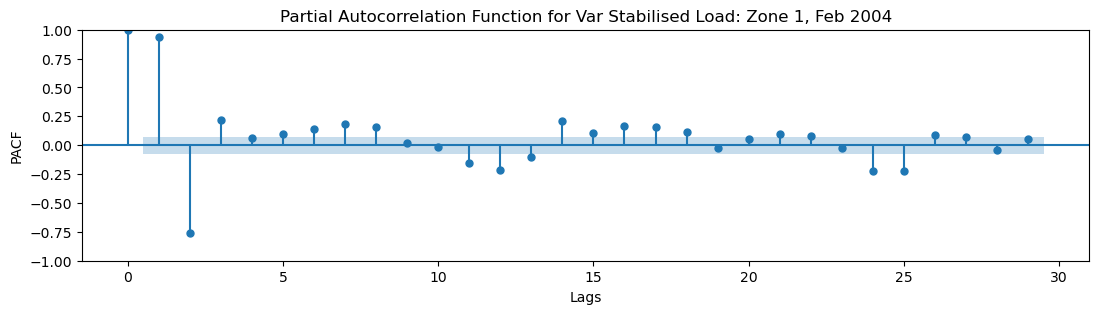

In [4]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Feb 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["year"]==2004)&(load_long_z1["month"]==2),"log_load_rs"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Var Stabilised Load: Zone 1, Feb 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("PACF")

Text(0, 0.5, 'PACF')

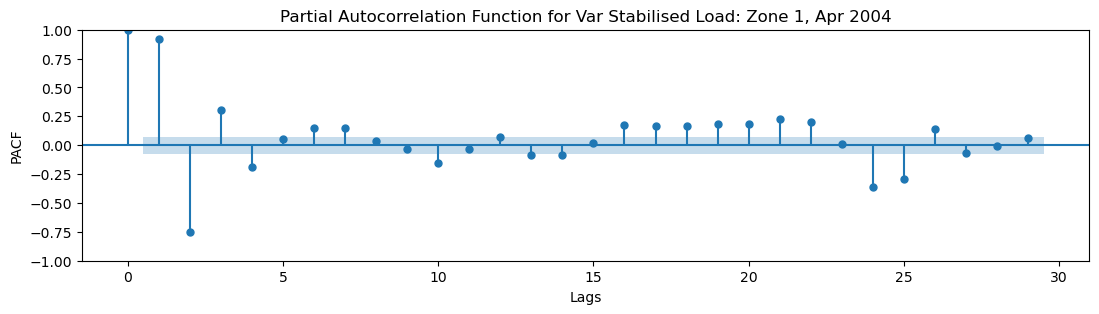

In [5]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Apr 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["year"]==2004)&(load_long_z1["month"]==4),"log_load_rs"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Var Stabilised Load: Zone 1, Apr 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("PACF")

Text(0, 0.5, 'PACF')

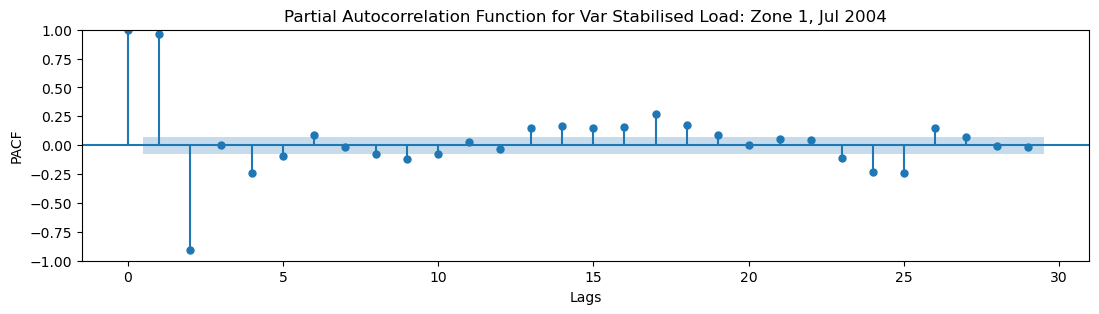

In [6]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Jul 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["year"]==2004)&(load_long_z1["month"]==7),"log_load_rs"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Var Stabilised Load: Zone 1, Jul 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("PACF")

Text(0, 0.5, 'PACF')

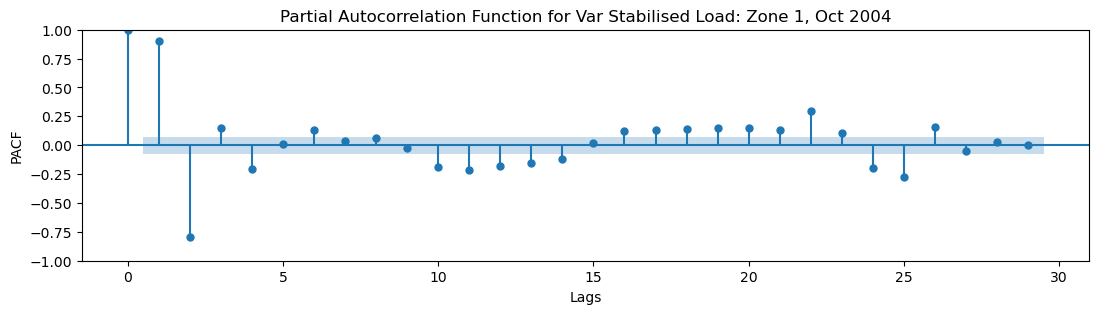

In [7]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Oct 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["year"]==2004)&(load_long_z1["month"]==10),"log_load_rs"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Var Stabilised Load: Zone 1, Oct 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("PACF")

Text(0, 0.5, 'PACF')

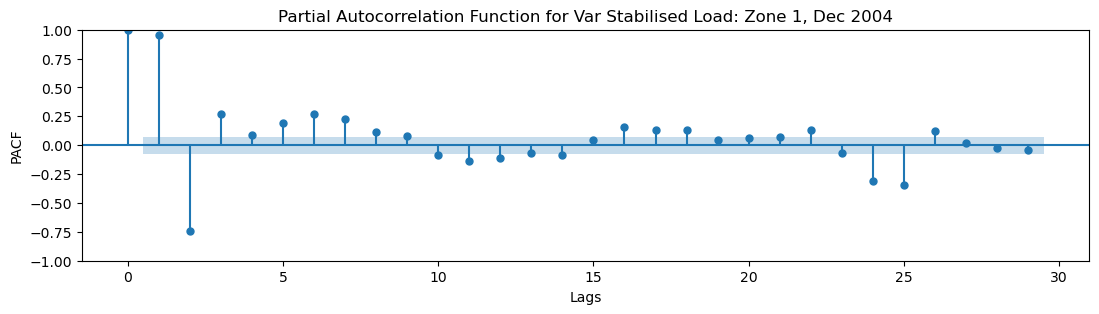

In [8]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Dec 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["year"]==2004)&(load_long_z1["month"]==12),"log_load_rs"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Var Stabilised Load: Zone 1, Dec 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("PACF")

No cut-off in either ACF or PACF (sinusoidal pattern in both cases). -> This indicates presence of ARMA(p,q)<br>
Note that ACFs and PACFs are plotted on non-stationary data just to get an idea of the series.<br>
To get true underlying structure for the data, we need to have both ACF and PACF on a stationary series.

#### Differencing
Trend and Seasonal adjustments to generate stationary series. Stationarity is essential to get the right underlying structure of the series and determine the order of MA and AR processes.

##### Seasonal Differencing

In [9]:
load_long_z1.head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs
0,1,2004,1,1,00:30,16853.0,2004-01-01 00:30:00,16.853,2.824529
1,1,2004,1,1,01:30,16450.0,2004-01-01 01:30:00,16.450,2.800325
2,1,2004,1,1,02:30,16517.0,2004-01-01 02:30:00,16.517,2.804390
3,1,2004,1,1,03:30,16873.0,2004-01-01 03:30:00,16.873,2.825715
4,1,2004,1,1,04:30,17064.0,2004-01-01 04:30:00,17.064,2.836971


###### Feb 2004

In [10]:
# Seasonal differencing with 24th lag - Only for zone 1 (2004); subsetting the data for Feb 2004

load_long_z1_feb04 = load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["zone_id"]==1)&(load_long_z1["year"]==2004)&(load_long_z1["month"]==2),['zone_id','year','month','day','hour','load','timestamp','load_rs','log_load_rs']]
s_differenced_feb04 = load_long_z1_feb04.sort_values(by="timestamp").loc[:, "log_load_rs"].diff(24)
load_long_z1_feb04['load_seasonally_differenced'] = s_differenced_feb04

# checking for stationarity after adjusting for seasonality and dropping missing values
check_stationarity(load_long_z1_feb04.dropna().reset_index(drop=True).load_seasonally_differenced)

ADF Statistic: -5.936099857253327
p-value: 2.3190200465029236e-07
Stationary


In [11]:
# DataFrame
load_long_z1_feb04.dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,2,2,00:30,23190.0,2004-02-02 00:30:00,23.190,3.143721,-0.094722
1,1,2004,2,2,01:30,23522.0,2004-02-02 01:30:00,23.522,3.157936,-0.095380
2,1,2004,2,2,02:30,24295.0,2004-02-02 02:30:00,24.295,3.190271,-0.083283
3,1,2004,2,2,03:30,25337.0,2004-02-02 03:30:00,25.337,3.232266,-0.071061
4,1,2004,2,2,04:30,26719.0,2004-02-02 04:30:00,26.719,3.285375,-0.041817


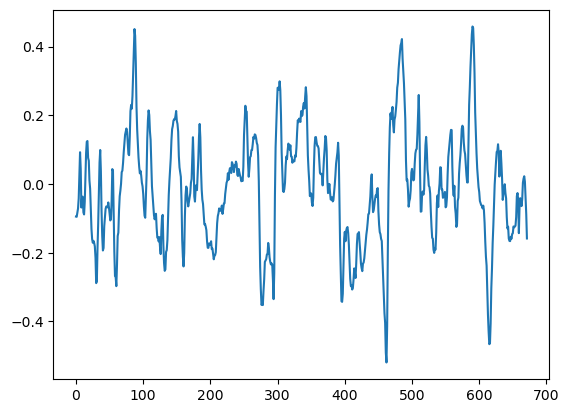

In [12]:
# Load values appear to have no trend, variance is generally even around avg level
plt.plot(load_long_z1_feb04.dropna().reset_index(drop=True).load_seasonally_differenced)

###### Apr 2004

In [13]:
# Seasonal differencing with 24th lag - Only for zone 1 (2004); subsetting the data for Apr 2004

load_long_z1_apr04 = load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["zone_id"]==1)&(load_long_z1["year"]==2004)&(load_long_z1["month"]==4),['zone_id','year','month','day','hour','load','timestamp','load_rs','log_load_rs']]
s_differenced_apr04 = load_long_z1_apr04.sort_values(by="timestamp").loc[:, "log_load_rs"].diff(24)
load_long_z1_apr04['load_seasonally_differenced'] = s_differenced_apr04
load_long_z1_apr04.head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
2184,1,2004,4,1,00:30,14095.0,2004-04-01 00:30:00,14.095,2.645820,NaN
2185,1,2004,4,1,01:30,13928.0,2004-04-01 01:30:00,13.928,2.633901,NaN
2186,1,2004,4,1,02:30,13916.0,2004-04-01 02:30:00,13.916,2.633039,NaN
2187,1,2004,4,1,03:30,14101.0,2004-04-01 03:30:00,14.101,2.646246,NaN
2188,1,2004,4,1,04:30,14710.0,2004-04-01 04:30:00,14.710,2.688528,NaN


In [14]:
# Removing missing values
load_long_z1_apr04.dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,4,2,00:30,15240.0,2004-04-02 00:30:00,15.240,2.723924,0.078103
1,1,2004,4,2,01:30,15126.0,2004-04-02 01:30:00,15.126,2.716415,0.082514
2,1,2004,4,2,02:30,15132.0,2004-04-02 02:30:00,15.132,2.716812,0.083772
3,1,2004,4,2,03:30,15290.0,2004-04-02 03:30:00,15.290,2.727199,0.080953
4,1,2004,4,2,04:30,15958.0,2004-04-02 04:30:00,15.958,2.769960,0.081433


In [15]:
# checking for stationarity after adjusting for seasonality
check_stationarity(load_long_z1_apr04.dropna().reset_index(drop=True).load_seasonally_differenced)

ADF Statistic: -6.376770179651941
p-value: 2.2736404210168964e-08
Stationary


The series is stationary!

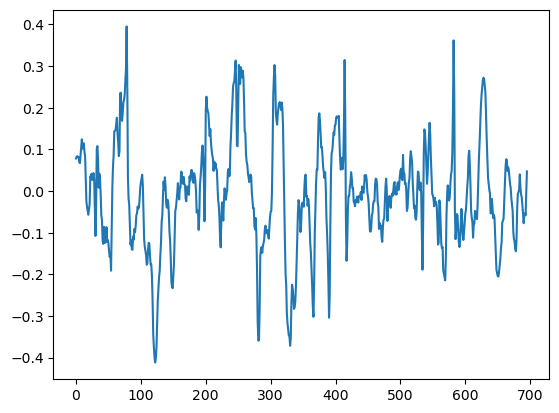

In [16]:
# Load values appear to have no trend, variance is generally even around avg level
plt.plot(load_long_z1_apr04.dropna().reset_index(drop=True).load_seasonally_differenced)

###### Jul 2004

In [17]:
# Seasonal differencing with 24th lag - Only for zone 1 (2004); subsetting the data for Jul 2004

load_long_z1_jul04 = load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["zone_id"]==1)&(load_long_z1["year"]==2004)&(load_long_z1["month"]==7),['zone_id','year','month','day','hour','load','timestamp','load_rs','log_load_rs']]
s_differenced_jul04 = load_long_z1_jul04.sort_values(by="timestamp").loc[:, "log_load_rs"].diff(24)
load_long_z1_jul04['load_seasonally_differenced'] = s_differenced_jul04

# checking for stationarity after adjusting for seasonality and dropping missing values
check_stationarity(load_long_z1_jul04.dropna().reset_index(drop=True).load_seasonally_differenced)

ADF Statistic: -7.0652875239053134
p-value: 5.099339694550086e-10
Stationary


In [18]:
# DataFrame
load_long_z1_jul04.dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,7,2,00:30,16183.0,2004-07-02 00:30:00,16.183,2.783961,0.125732
1,1,2004,7,2,01:30,14372.0,2004-07-02 01:30:00,14.372,2.665282,0.116775
2,1,2004,7,2,02:30,13360.0,2004-07-02 02:30:00,13.360,2.592265,0.109862
3,1,2004,7,2,03:30,12626.0,2004-07-02 03:30:00,12.626,2.535758,0.088294
4,1,2004,7,2,04:30,12476.0,2004-07-02 04:30:00,12.476,2.523807,0.093180


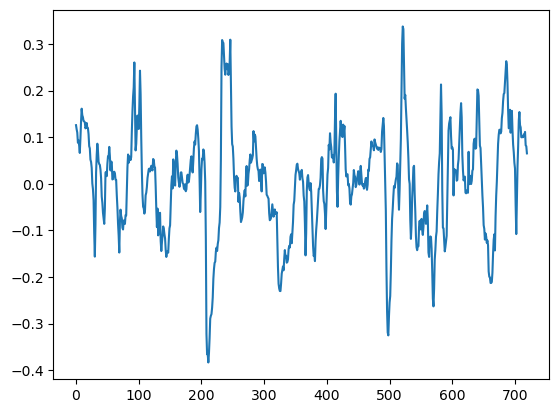

In [19]:
# Load values appear to have no trend, variance is generally even around avg level
plt.plot(load_long_z1_jul04.dropna().reset_index(drop=True).load_seasonally_differenced)

###### Oct 2004

In [20]:
# Seasonal differencing with 24th lag - Only for zone 1 (2004); subsetting the data for Oct 2004

load_long_z1_oct04 = load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["zone_id"]==1)&(load_long_z1["year"]==2004)&(load_long_z1["month"]==10),['zone_id','year','month','day','hour','load','timestamp','load_rs','log_load_rs']]
s_differenced_oct04 = load_long_z1_oct04.sort_values(by="timestamp").loc[:, "log_load_rs"].diff(24)
load_long_z1_oct04['load_seasonally_differenced'] = s_differenced_oct04

# checking for stationarity after adjusting for seasonality and dropping missing values
check_stationarity(load_long_z1_oct04.dropna().reset_index(drop=True).load_seasonally_differenced)

ADF Statistic: -8.642832019440856
p-value: 5.36820862720378e-14
Stationary


In [21]:
# DataFrame
load_long_z1_oct04.dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,10,2,00:30,11053.0,2004-10-02 00:30:00,11.053,2.402702,-0.007391
1,1,2004,10,2,01:30,10275.0,2004-10-02 01:30:00,10.275,2.329714,0.005269
2,1,2004,10,2,02:30,9875.0,2004-10-02 02:30:00,9.875,2.290006,-0.003538
3,1,2004,10,2,03:30,9768.0,2004-10-02 03:30:00,9.768,2.279112,-0.010287
4,1,2004,10,2,04:30,9601.0,2004-10-02 04:30:00,9.601,2.261867,-0.041817


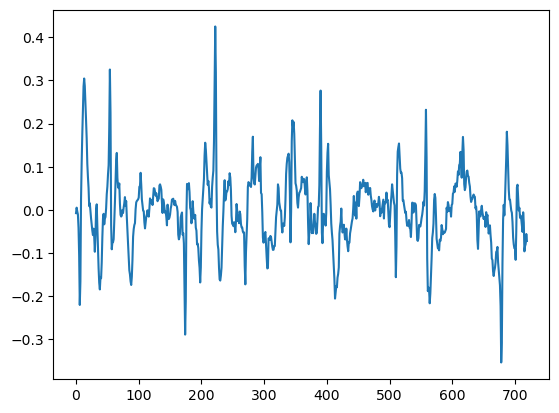

In [22]:
# Load values appear to have no trend, variance is generally even around avg level
plt.plot(load_long_z1_oct04.dropna().reset_index(drop=True).load_seasonally_differenced)

###### Dec 2004

In [23]:
# Seasonal differencing with 24th lag - Only for zone 1 (2004); subsetting the data for Dec 2004

load_long_z1_dec04 = load_long_z1.sort_values(by="timestamp").loc[(load_long_z1["zone_id"]==1)&(load_long_z1["year"]==2004)&(load_long_z1["month"]==12),['zone_id','year','month','day','hour','load','timestamp','load_rs','log_load_rs']]
s_differenced_dec04 = load_long_z1_dec04.sort_values(by="timestamp").loc[:, "log_load_rs"].diff(24)
load_long_z1_dec04['load_seasonally_differenced'] = s_differenced_dec04

# checking for stationarity after adjusting for seasonality and dropping missing values
check_stationarity(load_long_z1_dec04.dropna().reset_index(drop=True).load_seasonally_differenced)

ADF Statistic: -4.581923966418695
p-value: 0.00013945015777377424
Stationary


In [24]:
# DataFrame
load_long_z1_dec04.dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,12,2,00:30,17343.0,2004-12-02 00:30:00,17.343,2.853189,0.202415
1,1,2004,12,2,01:30,17389.0,2004-12-02 01:30:00,17.389,2.855838,0.246356
2,1,2004,12,2,02:30,17656.0,2004-12-02 02:30:00,17.656,2.871076,0.262772
3,1,2004,12,2,03:30,18347.0,2004-12-02 03:30:00,18.347,2.909466,0.292289
4,1,2004,12,2,04:30,19486.0,2004-12-02 04:30:00,19.486,2.969696,0.323592


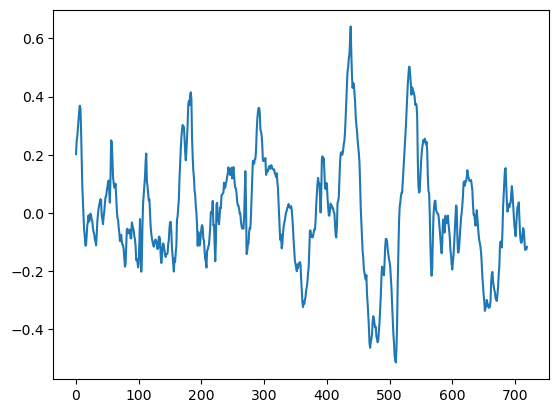

In [25]:
# Load values appear to have no trend, variance is generally even around avg level
plt.plot(load_long_z1_dec04.dropna().reset_index(drop=True).load_seasonally_differenced)

### ACFs and PACFs
Here, ACFs and PACFs are plotted on series after doing appropriate differencing.

##### Feb 2004

Text(0, 0.5, 'ACF')

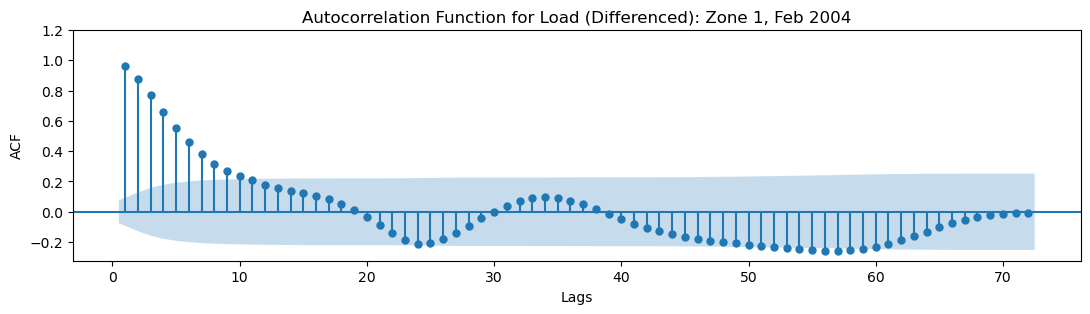

In [26]:
# Observing the ACF plot - Only for zone 1 (2004); subsetting the data for Feb 2004
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(13,3))
plot_acf(load_long_z1_feb04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"], 
         lags=72, # lags for last 3 days
         ax=ax,
         zero=False, 
         bartlett_confint=True, 
         auto_ylims=True)

ax.set_title("Autocorrelation Function for Load (Differenced): Zone 1, Feb 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Text(0, 0.5, 'ACF')

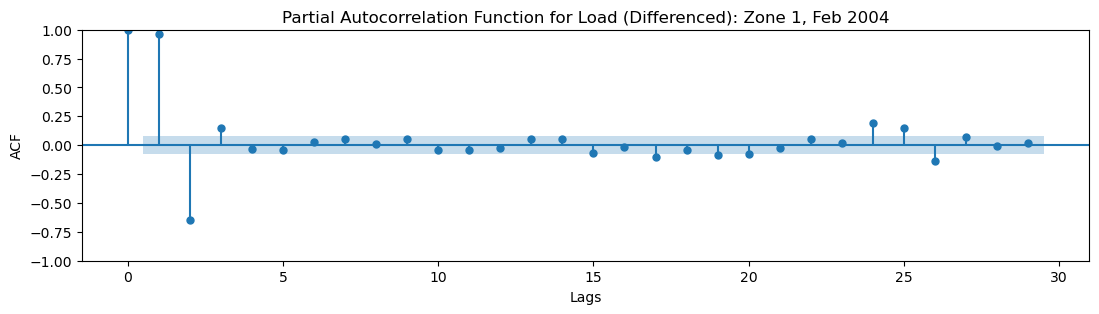

In [27]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Feb 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1_feb04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Load (Differenced): Zone 1, Feb 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

##### Apr 2004

In [28]:
# How the seasonally differenced data appears
load_long_z1_apr04.sort_values(by="timestamp").dropna().reset_index(drop=True).head()

,zone_id,year,month,day,hour,load,timestamp,load_rs,log_load_rs,load_seasonally_differenced
0,1,2004,4,2,00:30,15240.0,2004-04-02 00:30:00,15.240,2.723924,0.078103
1,1,2004,4,2,01:30,15126.0,2004-04-02 01:30:00,15.126,2.716415,0.082514
2,1,2004,4,2,02:30,15132.0,2004-04-02 02:30:00,15.132,2.716812,0.083772
3,1,2004,4,2,03:30,15290.0,2004-04-02 03:30:00,15.290,2.727199,0.080953
4,1,2004,4,2,04:30,15958.0,2004-04-02 04:30:00,15.958,2.769960,0.081433


Text(0, 0.5, 'ACF')

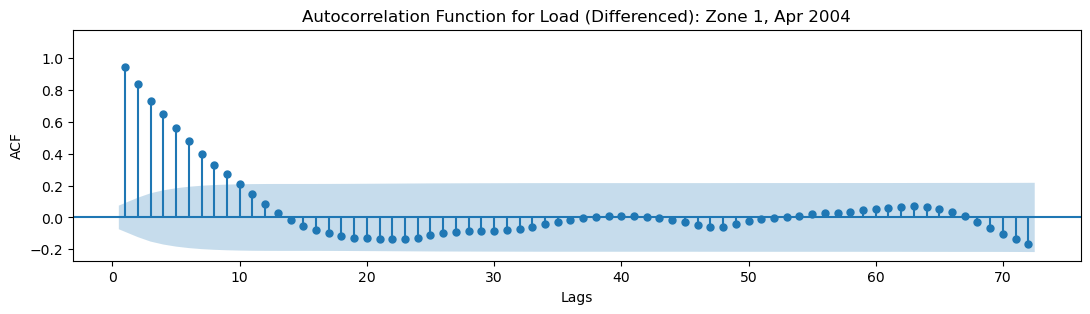

In [29]:
# Observing the ACF plot - Only for zone 1 (2004); subsetting the data for Apr 2004
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(13,3))
plot_acf(load_long_z1_apr04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"], 
         lags=72, # lags for last 3 days
         ax=ax,
         zero=False, 
         bartlett_confint=True, 
         auto_ylims=True)

ax.set_title("Autocorrelation Function for Load (Differenced): Zone 1, Apr 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Text(0, 0.5, 'ACF')

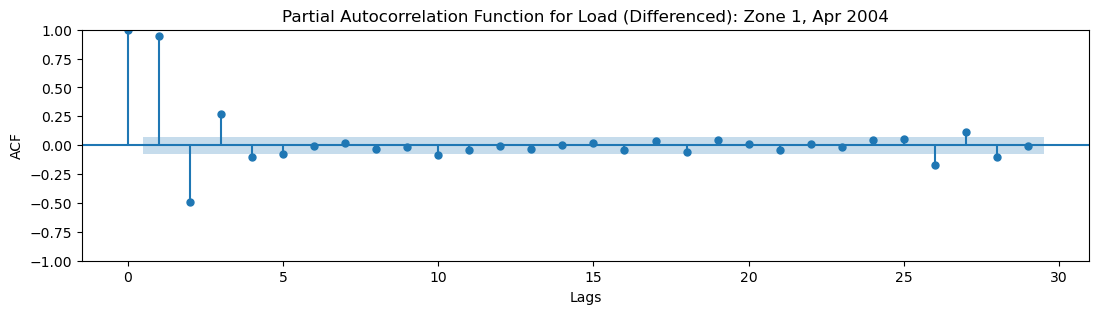

In [30]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Apr 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1_apr04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Load (Differenced): Zone 1, Apr 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

##### Jul 2004

Text(0, 0.5, 'ACF')

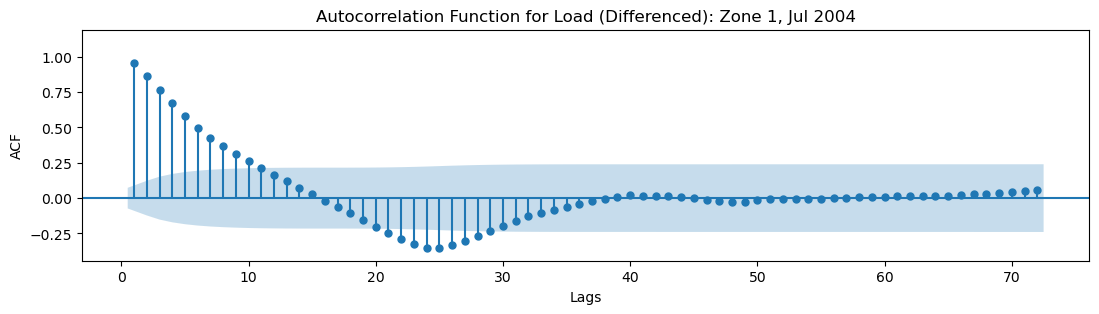

In [31]:
# Observing the ACF plot - Only for zone 1 (2004); subsetting the data for Jul 2004
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(13,3))
plot_acf(load_long_z1_jul04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"], 
         lags=72, # lags for last 3 days
         ax=ax,
         zero=False, 
         bartlett_confint=True, 
         auto_ylims=True)

ax.set_title("Autocorrelation Function for Load (Differenced): Zone 1, Jul 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Text(0, 0.5, 'ACF')

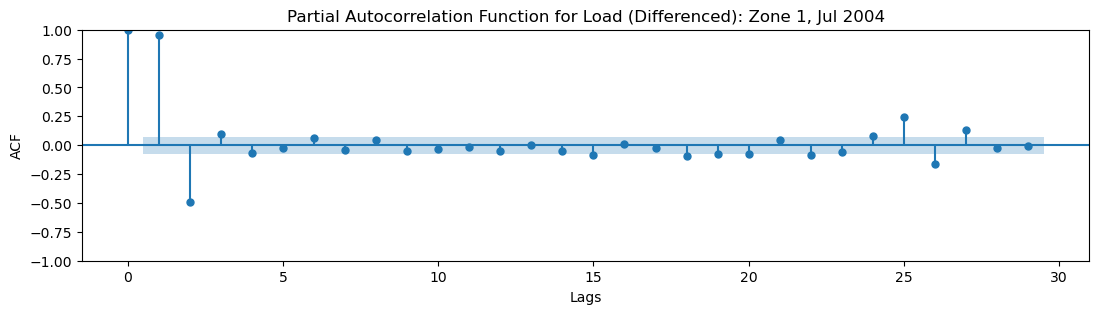

In [32]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Jul 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1_jul04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Load (Differenced): Zone 1, Jul 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

##### Oct 2004

Text(0, 0.5, 'ACF')

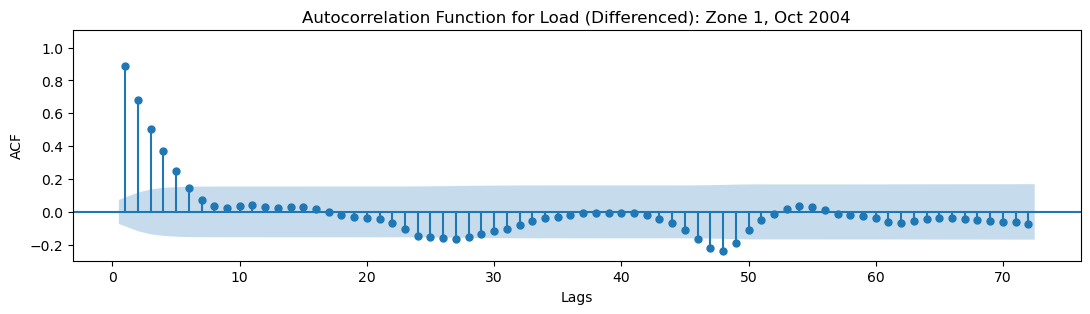

In [33]:
# Observing the ACF plot - Only for zone 1 (2004); subsetting the data for Oct 2004
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(13,3))
plot_acf(load_long_z1_oct04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"], 
         lags=72, # lags for last 3 days
         ax=ax,
         zero=False, 
         bartlett_confint=True, 
         auto_ylims=True)

ax.set_title("Autocorrelation Function for Load (Differenced): Zone 1, Oct 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Text(0, 0.5, 'ACF')

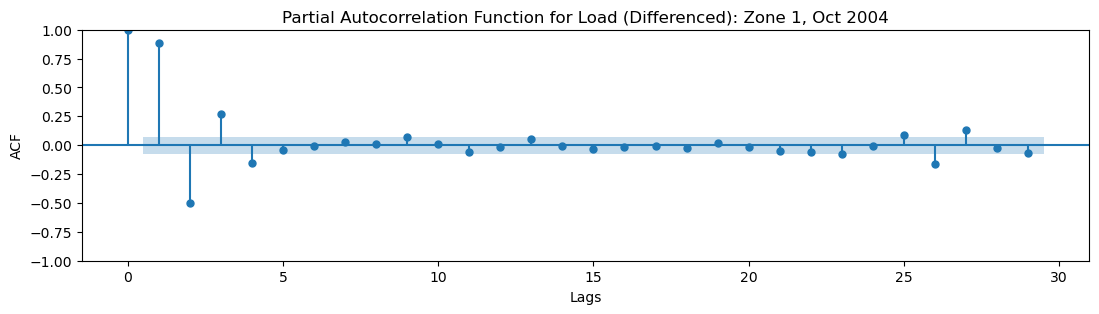

In [34]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Oct 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1_oct04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Load (Differenced): Zone 1, Oct 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

##### Dec 2004

Text(0, 0.5, 'ACF')

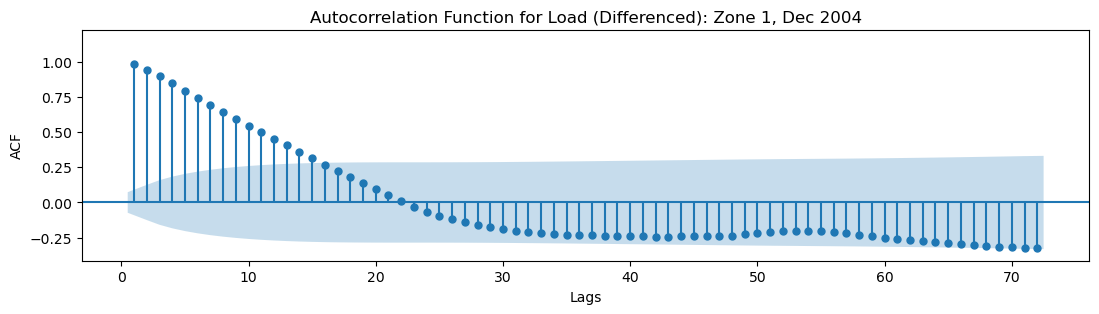

In [35]:
# Observing the ACF plot - Only for zone 1 (2004); subsetting the data for Dec 2004
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(13,3))
plot_acf(load_long_z1_dec04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"], 
         lags=72, # lags for last 3 days
         ax=ax,
         zero=False, 
         bartlett_confint=True, 
         auto_ylims=True)

ax.set_title("Autocorrelation Function for Load (Differenced): Zone 1, Dec 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Text(0, 0.5, 'ACF')

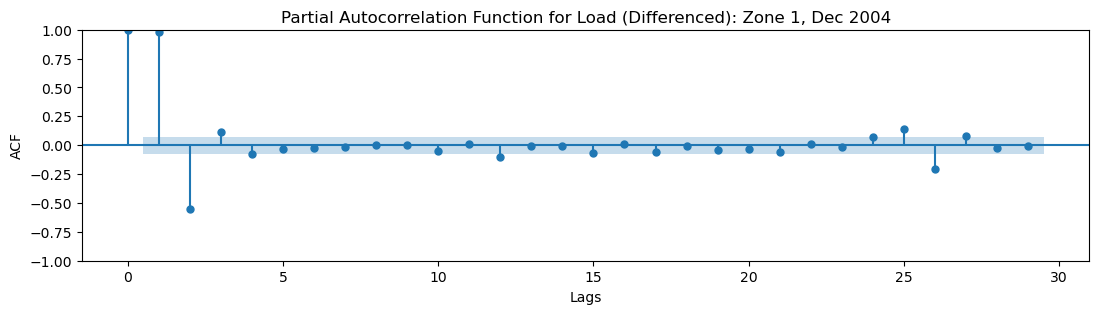

In [36]:
# Observing the PACF plot - Only for zone 1 (2004); subsetting the data for Dec 2004
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(13,3))
plot_pacf(load_long_z1_dec04.sort_values(by="timestamp").dropna().reset_index(drop=True).loc[:,"load_seasonally_differenced"],
         ax=ax)

ax.set_title("Partial Autocorrelation Function for Load (Differenced): Zone 1, Dec 2004")
ax.set_xlabel("Lags")
ax.set_ylabel("ACF")

Observing the plots across many portions of the series, we see:
- from ACF that there is no sharp drop but slow decay (suggesting process is likely not pure MA)
- from PACF that lags till 2 or 3 are significant (non-seasonal order) along with significance at lag 24 (easonal order)
- PACF does show sinusoidal pattern (suggesting an AR process)
- Previous seasonal lags are likely important

### SARIMAX - Without exogenous regressors
Here the order for both non-seasonal and seasonal AR, MA must be found out. We are aware that there is seasonality and PACF seem to become significant again at lag 24.<br>
Hence the model being worked at is either:
- SARIMA((p,0,q),(0,1,0,24)) i.e. ARIMA(p,0,q) on seasonally differenced series or,
- SARIMA((p,0,q),(P,1,Q,24))

##### Testing on Last Week of Jan 2004 (Zone 1)
Last week of Jan 2004 is used for testing. Multiple SARIMA models are evaluated and compared.
>NOTE: Length of training data can affect test performance. 

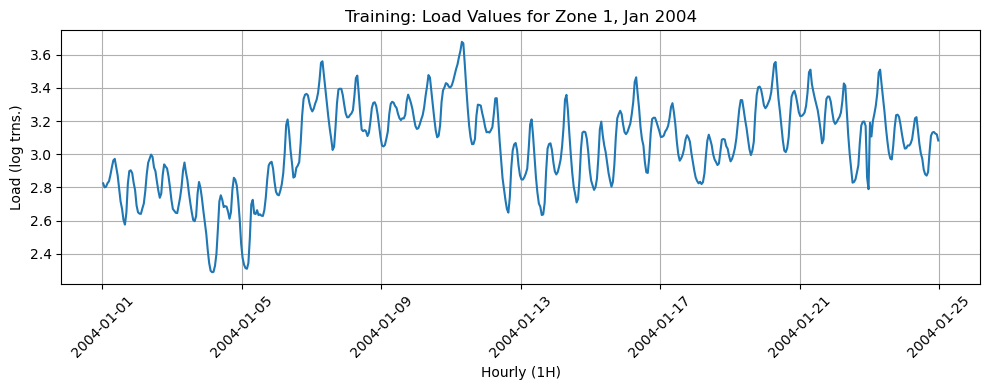

In [37]:
# Creating training data
load_long_z1_jan04_train = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 1),["timestamp","log_load_rs"]]
load_long_z1_jan04_train = load_long_z1_jan04_train.set_index("timestamp")
load_long_z1_jan04_train = load_long_z1_jan04_train[:'2004-01-24 23:30:00']
load_long_z1_jan04_train.index = pd.to_datetime(load_long_z1_jan04_train.index)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_jan04_train, x=load_long_z1_jan04_train.index, y=load_long_z1_jan04_train.log_load_rs, ax=ax)
ax.set_title("Training: Load Values for Zone 1, Jan 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [38]:
# Comparing models - auto_arima

import pmdarima as pm
smodel_jan = pm.auto_arima(load_long_z1_jan04_train["log_load_rs"].asfreq('h'), start_p=0, start_q=0,test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-222.247, Time=0.48 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1792.450, Time=3.86 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-881.915, Time=6.57 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-222.601, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1718.893, Time=1.38 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1838.343, Time=10.81 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=13.69 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=8.52 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-268.392, Time=3.64 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-1926.561, Time=16.51 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-1882.505, Time=8.66 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=22.35 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=9.23 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=-1931.018, Time=20.41 sec
 ARIMA(3,0,0)(1,1,0)[24] int

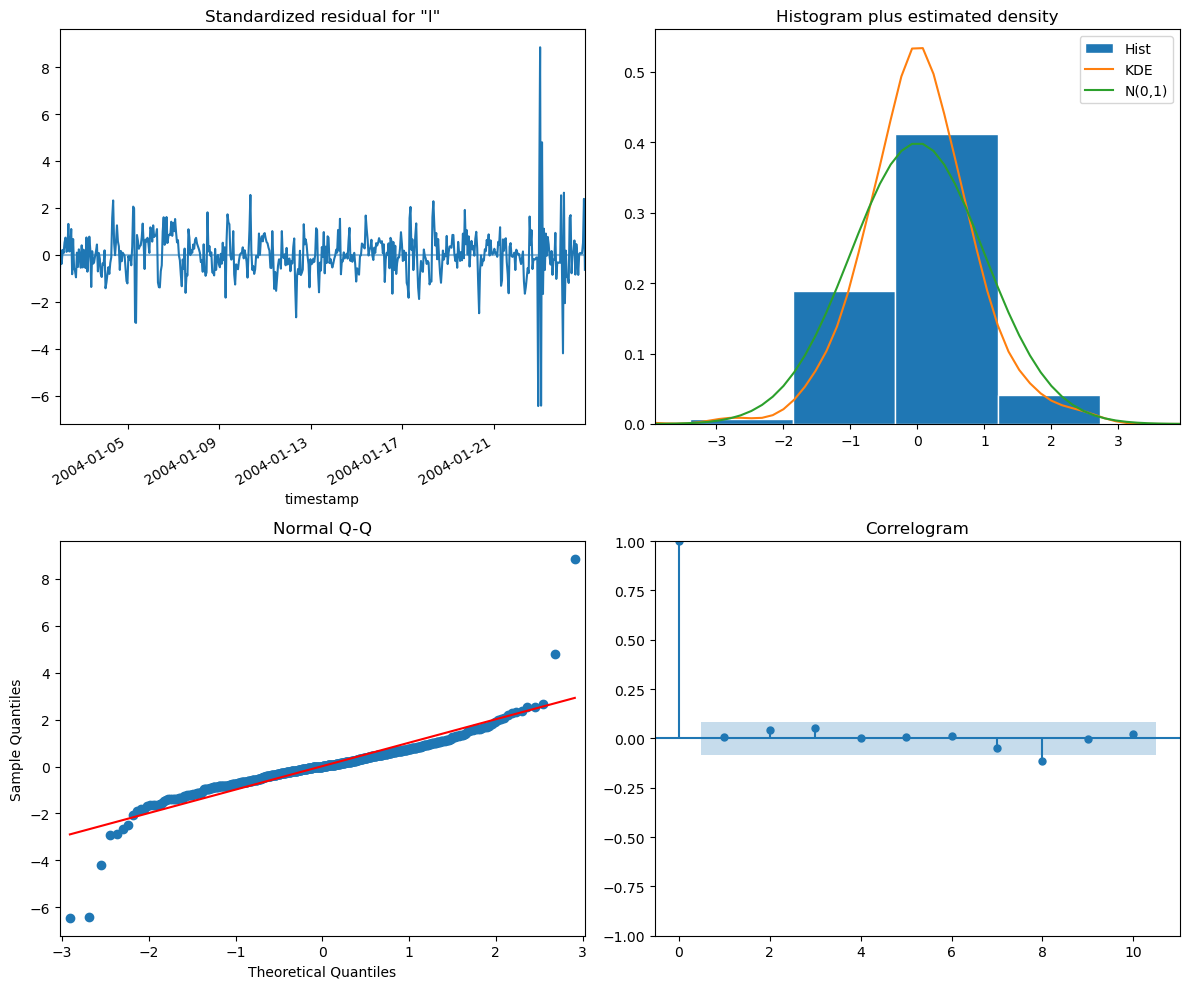

In [146]:
# Diagnostics (for (1,1,2,0))

import statsmodels.api as sm
SARIMA_model = sm.tsa.statespace.SARIMAX(
        load_long_z1_jan04_train["log_load_rs"].asfreq('h'), 
        order=(1,0,1),  # non-seasonal with no differencing
        seasonal_order=(2,1,0,24) # seasonal differencing
        )

SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(12,10))
plt.tight_layout()
plt.show()

The correlogram shows no meaningful remaining autocorrelation (all lags inside the CI), so SARIMA(1,0,1)(2,1,0,24) is doing a good job removing serial dependence.

But the QQ plot, histogram/KDE and the standardized residuals time plot show heavy tails and a few large outliers (and some skew). That means residuals are not Gaussian and there is heteroskedasticity/outliers.

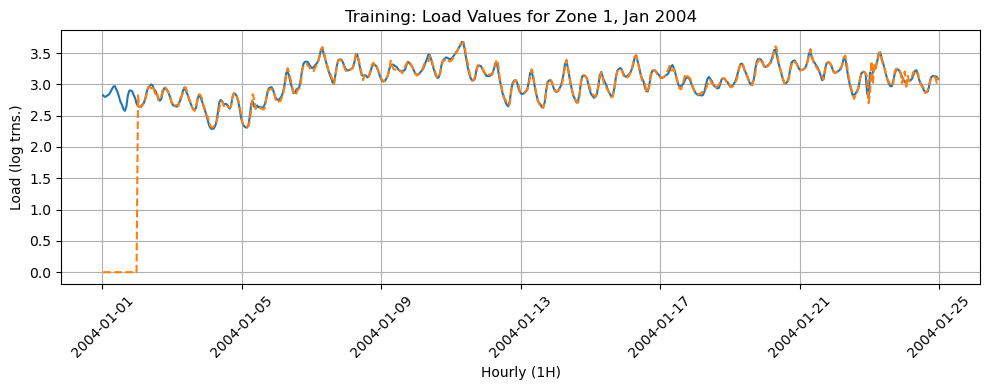

In [147]:
# Fit on the training data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_jan04_train, x=load_long_z1_jan04_train.index, y=load_long_z1_jan04_train.log_load_rs, ax=ax)
sns.lineplot(SARIMA_model_fit.fittedvalues, linestyle = '--')
ax.set_title("Training: Load Values for Zone 1, Jan 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

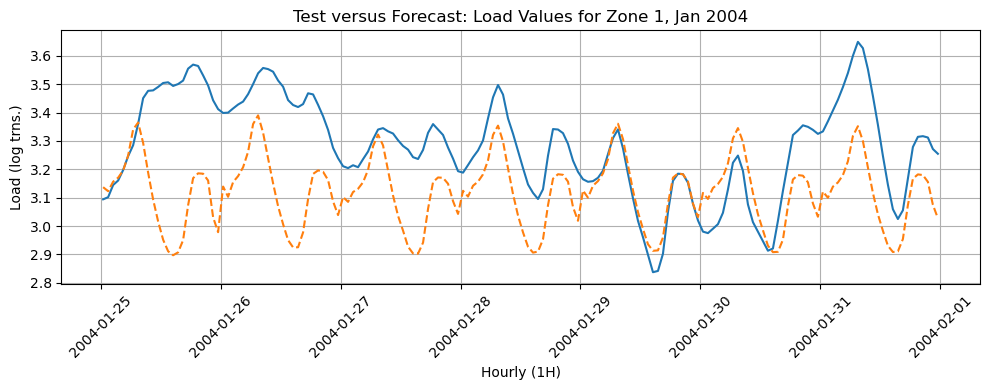

In [148]:
# Predicting 24*7 steps ahead
forecast_jan04 = SARIMA_model_fit.get_forecast(steps=24*7).predicted_mean

# Creating test data
load_long_z1_jan04_test = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 1),["timestamp","log_load_rs"]]
load_long_z1_jan04_test = load_long_z1_jan04_test.set_index("timestamp")
load_long_z1_jan04_test = load_long_z1_jan04_test['2004-01-25 00:30:00':]
load_long_z1_jan04_test.index = pd.to_datetime(load_long_z1_jan04_test.index)

# Fit on the test data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_jan04_test, x=load_long_z1_jan04_test.index, y=load_long_z1_jan04_test.log_load_rs, ax=ax)
sns.lineplot(forecast_jan04, linestyle = '--')
ax.set_title("Test versus Forecast: Load Values for Zone 1, Jan 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [149]:
# Performance on test set

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(f"R2 score: {r2_score(load_long_z1_jan04_test.log_load_rs, forecast_jan04)}")
print(f'MSE score: {mean_squared_error(load_long_z1_jan04_test.log_load_rs, forecast_jan04)}')
print(f'MAE score: {mean_absolute_error(load_long_z1_jan04_test.log_load_rs, forecast_jan04)}')
print(f'MAPE score: {mean_absolute_percentage_error(load_long_z1_jan04_test.log_load_rs, forecast_jan04)}')

R2 score: -0.8247677603189028
MSE score: 0.0557312161535373
MAE score: 0.18777647579968312
MAPE score: 0.055830749457850416


The performance is lower compared to Exponential Smoothing, but better than other approaches.

##### Testing on Last Week of Apr 2004 (Zone 1)
Last week of Apr 2004 is used for testing. Multiple SARIMA models are evaluated and compared.

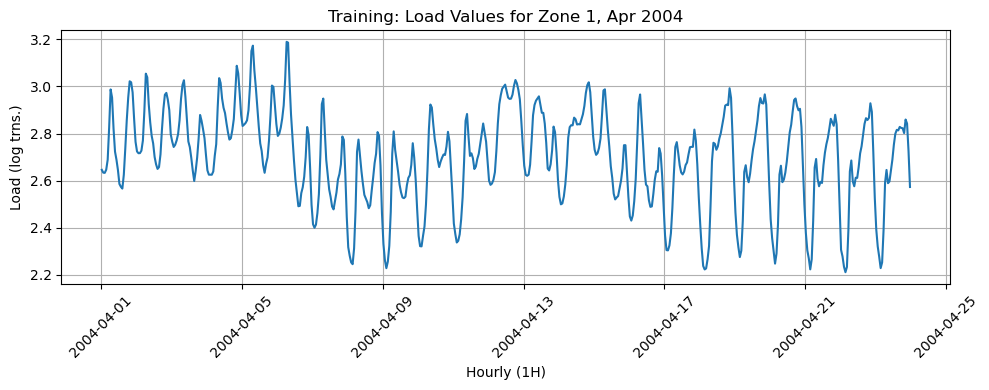

In [150]:
# Creating training data
load_long_z1_apr04_train = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 4),["timestamp","log_load_rs"]]
load_long_z1_apr04_train = load_long_z1_apr04_train.set_index("timestamp")
load_long_z1_apr04_train = load_long_z1_apr04_train[:'2004-04-23 23:30:00']
load_long_z1_apr04_train.index = pd.to_datetime(load_long_z1_apr04_train.index)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_apr04_train, x=load_long_z1_apr04_train.index, y=load_long_z1_apr04_train.log_load_rs, ax=ax)
ax.set_title("Training: Load Values for Zone 1, Apr 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [90]:
# Comparing models - auto_arima

import pmdarima as pm
smodel_apr = pm.auto_arima(load_long_z1_apr04_train["log_load_rs"].asfreq('h'), start_p=0, start_q=0,test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-606.059, Time=0.19 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1847.473, Time=2.23 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-1247.334, Time=4.25 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-606.908, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1838.448, Time=0.57 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1864.538, Time=9.80 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=23.43 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=5.42 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-614.200, Time=4.22 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-2024.969, Time=8.94 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-2002.840, Time=3.64 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=18.51 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=8.42 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=-2056.718, Time=21.34 sec
 ARIMA(3,0,0)(1,1,0)[24] inte

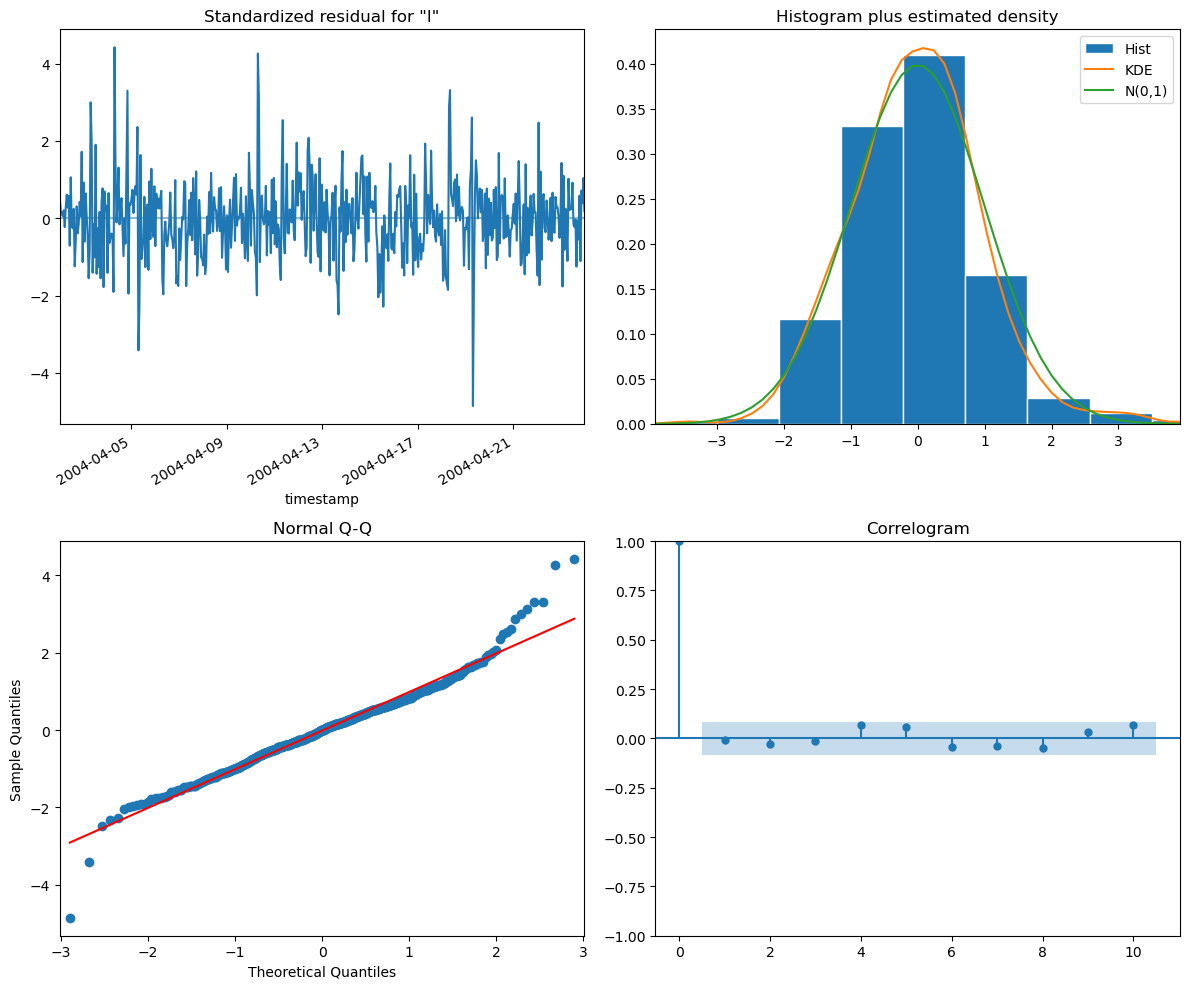

In [151]:
# Diagnostics (for (1,2,2,0))

import statsmodels.api as sm
SARIMA_model = sm.tsa.statespace.SARIMAX(
        load_long_z1_apr04_train["log_load_rs"].asfreq('h'), 
        order=(1,0,2),  # non-seasonal with no differencing
        seasonal_order=(2,1,0,24) # seasonal differencing
        )

SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(12,10))
plt.tight_layout()
plt.show()

Residual plot is much better:
- correlogram shows that autocorrelation has been captured well by the model
- q-q plot shows that residuals are roughly Gaussian (although some deviation in tails)

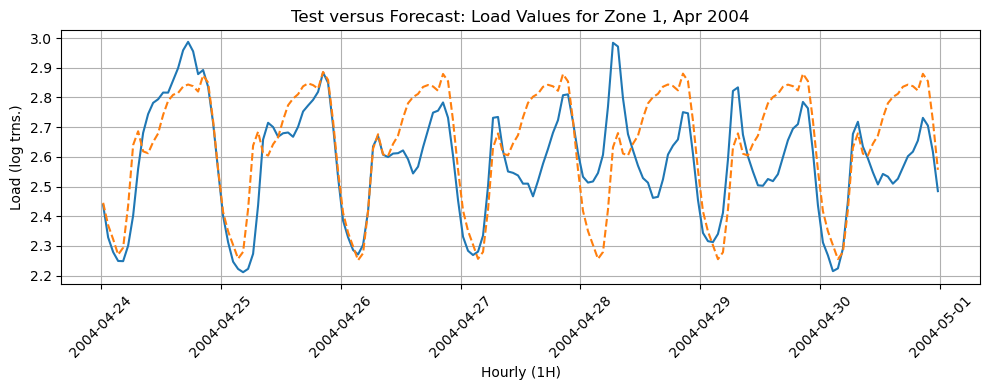

In [152]:
# Predicting 24*7 steps ahead
forecast_apr04 = SARIMA_model_fit.get_forecast(steps=24*7).predicted_mean

# Creating test data
load_long_z1_apr04_test = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 4),["timestamp","log_load_rs"]]
load_long_z1_apr04_test = load_long_z1_apr04_test.set_index("timestamp")
load_long_z1_apr04_test = load_long_z1_apr04_test['2004-04-24 00:30:00':]
load_long_z1_apr04_test.index = pd.to_datetime(load_long_z1_apr04_test.index)

# Fit on the test data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_apr04_test, x=load_long_z1_apr04_test.index, y=load_long_z1_apr04_test.log_load_rs, ax=ax)
sns.lineplot(forecast_apr04, linestyle = '--')
ax.set_title("Test versus Forecast: Load Values for Zone 1, Apr 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [153]:
# Performance on test set

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(f"R2 score: {r2_score(load_long_z1_apr04_test.log_load_rs, forecast_apr04)}")
print(f'MSE score: {mean_squared_error(load_long_z1_apr04_test.log_load_rs, forecast_apr04)}')
print(f'MAE score: {mean_absolute_error(load_long_z1_apr04_test.log_load_rs, forecast_apr04)}')
print(f'MAPE score: {mean_absolute_percentage_error(load_long_z1_apr04_test.log_load_rs, forecast_apr04)}')

R2 score: 0.32700241044302725
MSE score: 0.02302061247355171
MAE score: 0.11856346169371561
MAPE score: 0.04599203477953894


R2 score appears to be better than ES. This means that SARIMA model is explaining variance slightly better.

##### Testing on Last Week of Jul 2004 (Zone 1)
Last week of Jul 2004 is used for testing. Multiple SARIMA models are evaluated and compared.

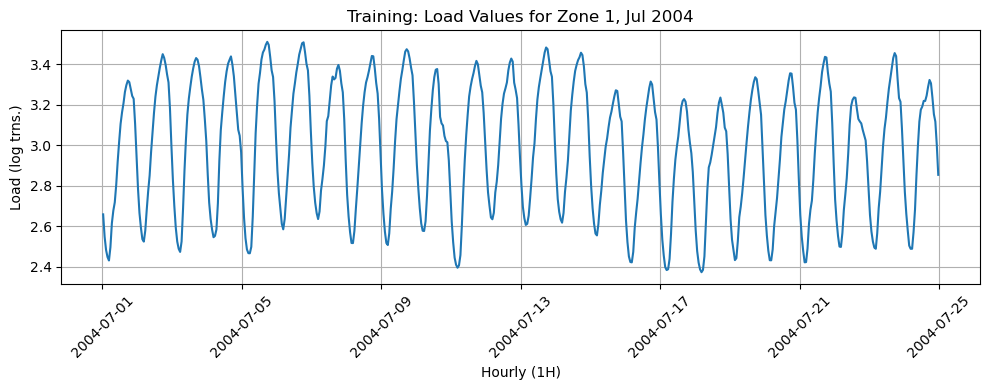

In [154]:
# Creating training data
load_long_z1_jul04_train = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 7),["timestamp","log_load_rs"]]
load_long_z1_jul04_train = load_long_z1_jul04_train.set_index("timestamp")
load_long_z1_jul04_train = load_long_z1_jul04_train[:'2004-07-24 23:30:00']
load_long_z1_jul04_train.index = pd.to_datetime(load_long_z1_jul04_train.index)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_jul04_train, x=load_long_z1_jul04_train.index, y=load_long_z1_jul04_train.log_load_rs, ax=ax)
ax.set_title("Training: Load Values for Zone 1, Jul 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [98]:
# Comparing models - auto_arima

smodel_jul = pm.auto_arima(load_long_z1_jul04_train["log_load_rs"].asfreq('h'), start_p=0, start_q=0,test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-848.997, Time=0.55 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-2262.487, Time=3.16 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-850.915, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-2190.474, Time=0.57 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-2286.816, Time=9.87 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=18.51 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=6.36 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-969.472, Time=5.87 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-2465.006, Time=11.36 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-2443.881, Time=6.66 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=21.04 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=12.33 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=-2490.865, Time=13.17 sec
 ARIMA(3,0,0)(1,1,0)[24] intercep

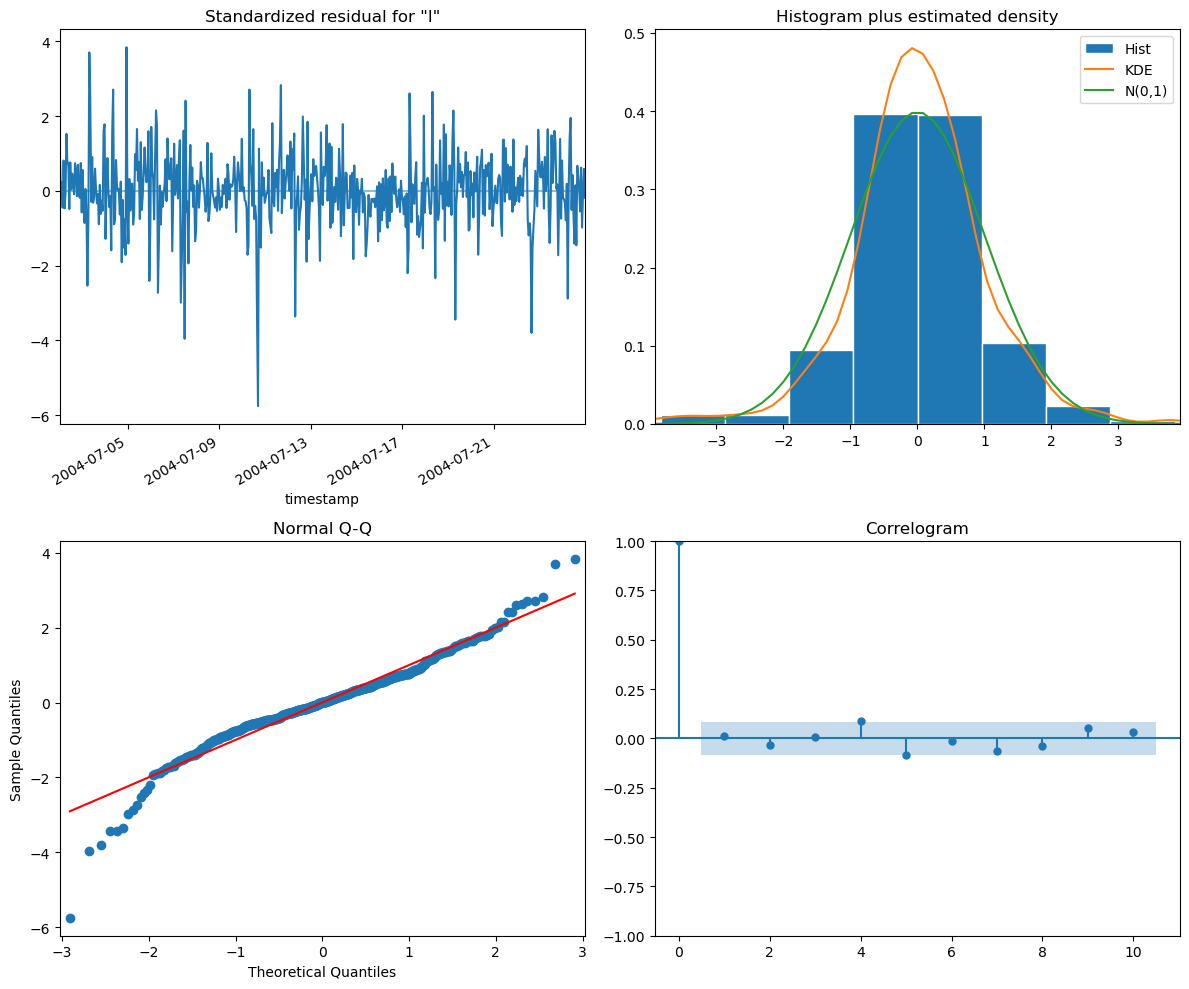

In [155]:
# Diagnostics (for (3,0,2,0))

import statsmodels.api as sm
SARIMA_model = sm.tsa.statespace.SARIMAX(
        load_long_z1_jul04_train["log_load_rs"].asfreq('h'), 
        order=(3,0,0),  # non-seasonal with no differencing
        seasonal_order=(2,1,0,24) # seasonal differencing
        )

SARIMA_model_fit = SARIMA_model.fit(disp=False)
SARIMA_model_fit.plot_diagnostics(figsize=(12,10))
plt.tight_layout()
plt.show()

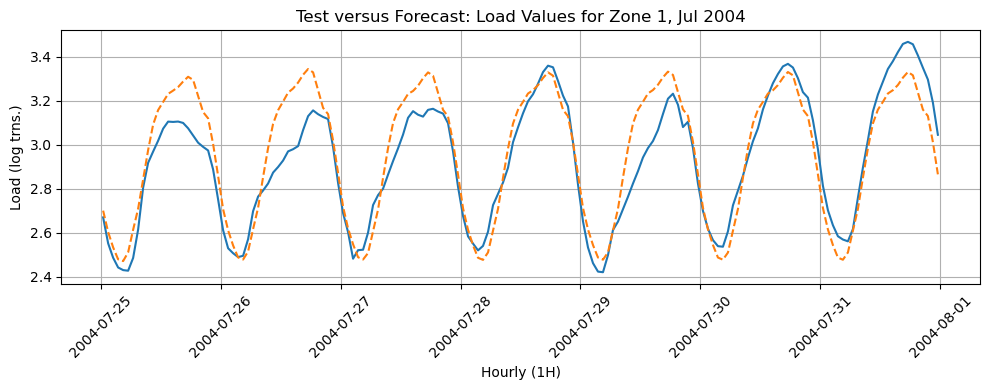

In [156]:
# Predicting 24*7 steps ahead
forecast_jul04 = SARIMA_model_fit.get_forecast(steps=24*7).predicted_mean

# Creating test data
load_long_z1_jul04_test = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 7),["timestamp","log_load_rs"]]
load_long_z1_jul04_test = load_long_z1_jul04_test.set_index("timestamp")
load_long_z1_jul04_test = load_long_z1_jul04_test['2004-07-25 00:30:00':]
load_long_z1_jul04_test.index = pd.to_datetime(load_long_z1_jul04_test.index)

# Fit on the test data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_jul04_test, x=load_long_z1_jul04_test.index, y=load_long_z1_jul04_test.log_load_rs, ax=ax)
sns.lineplot(forecast_jul04, linestyle = '--')
ax.set_title("Test versus Forecast: Load Values for Zone 1, Jul 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [157]:
# Performance on test set
print(f"R2 score: {r2_score(load_long_z1_jul04_test.log_load_rs, forecast_jul04)}")
print(f'MSE score: {mean_squared_error(load_long_z1_jul04_test.log_load_rs, forecast_jul04)}')
print(f'MAE score: {mean_absolute_error(load_long_z1_jul04_test.log_load_rs, forecast_jul04)}')
print(f'MAPE score: {mean_absolute_percentage_error(load_long_z1_jul04_test.log_load_rs, forecast_jul04)}')

R2 score: 0.8203590571903225
MSE score: 0.014187276044703975
MAE score: 0.09582527679315532
MAPE score: 0.032472267636707006


##### Testing on Last Week of Oct 2004 (Zone 1)
Last week of Oct 2004 is used for testing. Multiple SARIMA models are evaluated and compared.

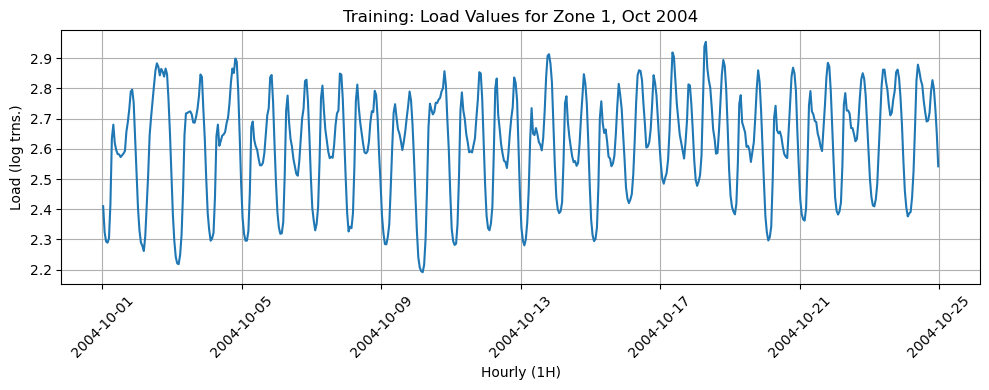

In [158]:
# Creating training data
load_long_z1_oct04_train = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 10),["timestamp","log_load_rs"]]
load_long_z1_oct04_train = load_long_z1_oct04_train.set_index("timestamp")
load_long_z1_oct04_train = load_long_z1_oct04_train[:'2004-10-24 23:30:00']
load_long_z1_oct04_train.index = pd.to_datetime(load_long_z1_oct04_train.index)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_oct04_train, x=load_long_z1_oct04_train.index, y=load_long_z1_oct04_train.log_load_rs, ax=ax)
ax.set_title("Training: Load Values for Zone 1, Oct 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [103]:
# Comparing models - auto_arima

smodel_oct = pm.auto_arima(load_long_z1_oct04_train["log_load_rs"].asfreq('h'), start_p=0, start_q=0,test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-1166.122, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1999.644, Time=3.70 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-1823.086, Time=4.10 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-1166.932, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1992.864, Time=1.10 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-2063.201, Time=11.36 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=17.30 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-1217.557, Time=6.63 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-2229.881, Time=10.57 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-2176.797, Time=5.56 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=20.08 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=8.18 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=-2268.467, Time=10.45 sec
 ARIMA(3,0,0)(1,1,0)[24]

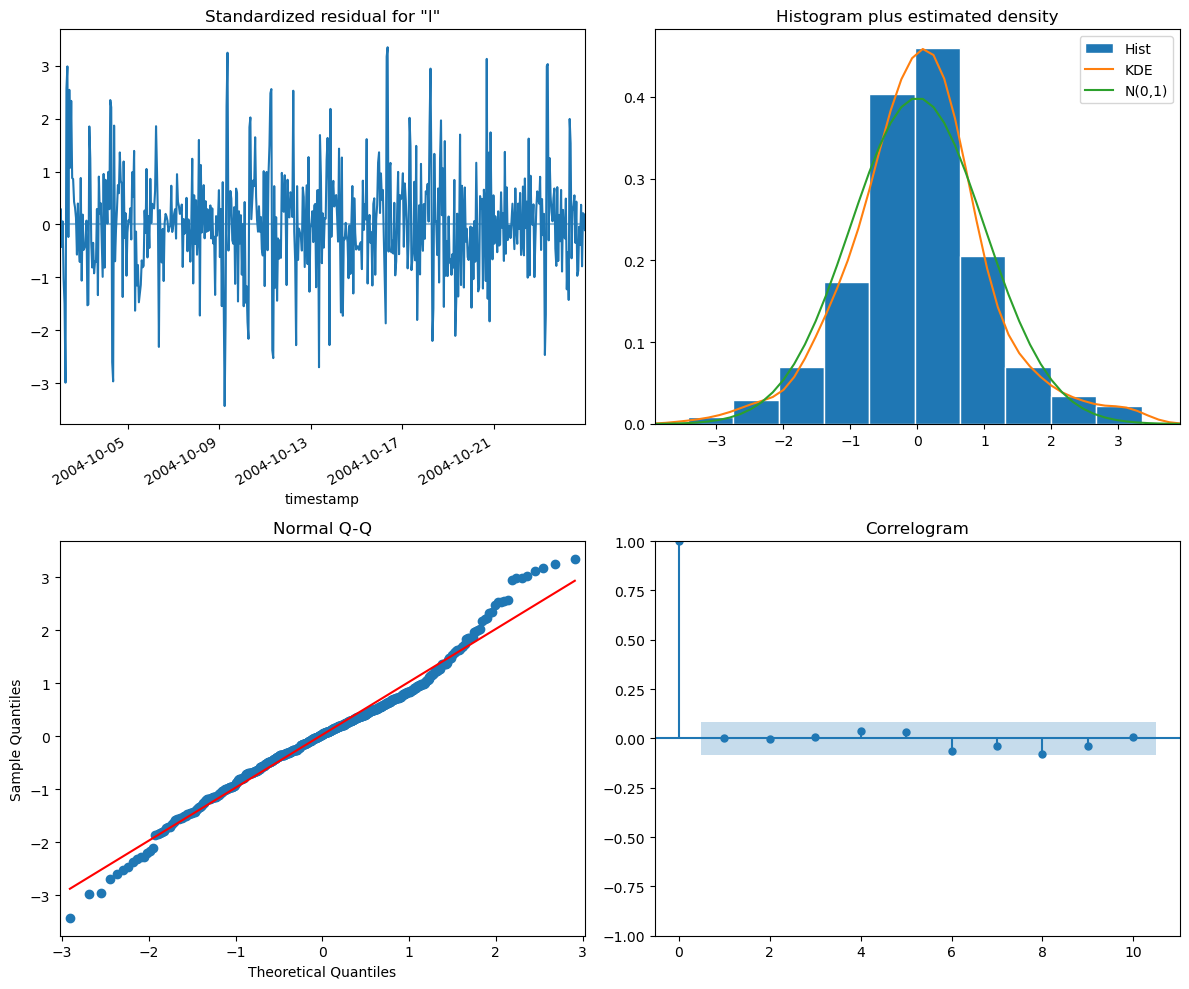

In [160]:
# Diagnostics (for (1,2,2,0))

SARIMA_model = sm.tsa.statespace.SARIMAX(
        load_long_z1_oct04_train["log_load_rs"].asfreq('h'), 
        order=(1,0,2),  # non-seasonal with no differencing
        seasonal_order=(2,1,0,24) # seasonal differencing
        )

SARIMA_model_fit = SARIMA_model.fit(disp=False, maxiter=500)
SARIMA_model_fit.plot_diagnostics(figsize=(12,10))
plt.tight_layout()
plt.show()

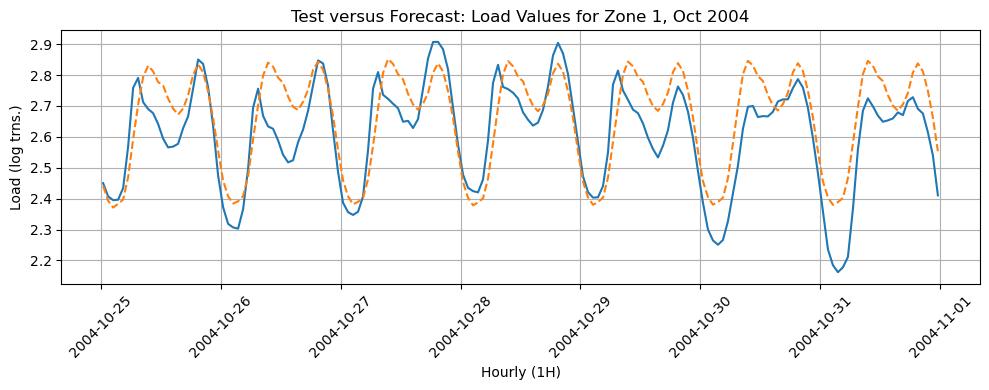

In [161]:
# Predicting 24*7 steps ahead
forecast_oct04 = SARIMA_model_fit.get_forecast(steps=24*7).predicted_mean

# Creating test data
load_long_z1_oct04_test = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 10),["timestamp","log_load_rs"]]
load_long_z1_oct04_test = load_long_z1_oct04_test.set_index("timestamp")
load_long_z1_oct04_test = load_long_z1_oct04_test['2004-10-25 00:30:00':]
load_long_z1_oct04_test.index = pd.to_datetime(load_long_z1_oct04_test.index)

# Fit on the test data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_oct04_test, x=load_long_z1_oct04_test.index, y=load_long_z1_oct04_test.log_load_rs, ax=ax)
sns.lineplot(forecast_oct04, linestyle = '--')
ax.set_title("Test versus Forecast: Load Values for Zone 1, Oct 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [162]:
# Performance on test set
print(f"R2 score: {r2_score(load_long_z1_oct04_test.log_load_rs, forecast_oct04)}")
print(f'MSE score: {mean_squared_error(load_long_z1_oct04_test.log_load_rs, forecast_oct04)}')
print(f'MAE score: {mean_absolute_error(load_long_z1_oct04_test.log_load_rs, forecast_oct04)}')
print(f'MAPE score: {mean_absolute_percentage_error(load_long_z1_oct04_test.log_load_rs, forecast_oct04)}')

R2 score: 0.5952034813128717
MSE score: 0.011430464602027764
MAE score: 0.09060921550957182
MAPE score: 0.03520968598150688


Performance is worse than exponential smoothing.

##### Testing on Last Week of Dec 2004 (Zone 1)
Last week of Dec 2004 is used for testing. Multiple SARIMA models are evaluated and compared.

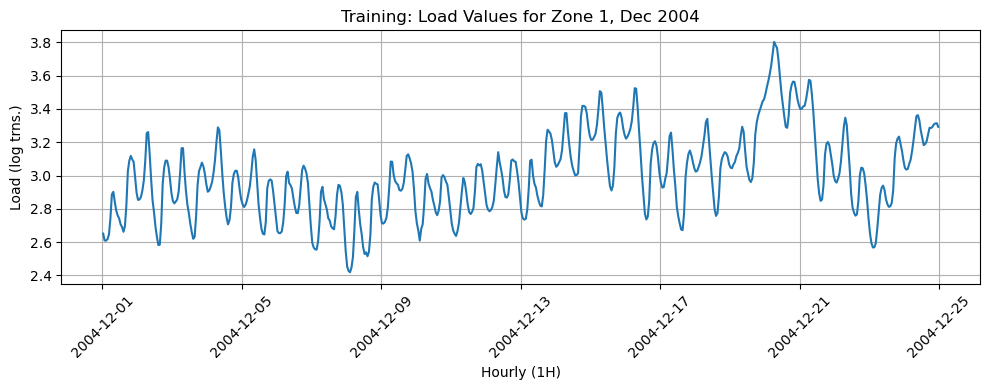

In [163]:
# Creating training data
load_long_z1_dec04_train = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 12),["timestamp","log_load_rs"]]
load_long_z1_dec04_train = load_long_z1_dec04_train.set_index("timestamp")
load_long_z1_dec04_train = load_long_z1_dec04_train[:'2004-12-24 23:30:00']
load_long_z1_dec04_train.index = pd.to_datetime(load_long_z1_dec04_train.index)

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_dec04_train, x=load_long_z1_dec04_train.index, y=load_long_z1_dec04_train.log_load_rs, ax=ax)
ax.set_title("Training: Load Values for Zone 1, Dec 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [164]:
# Comparing models - auto_arima

smodel_dec = pm.auto_arima(load_long_z1_dec04_train["log_load_rs"].asfreq('h'), start_p=0, start_q=0,test='adf',
                         max_p=3, max_q=3, m=24,
                         start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-189.388, Time=0.28 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-2071.608, Time=3.69 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=-921.883, Time=6.39 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-187.246, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-2047.934, Time=0.58 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-2094.685, Time=11.47 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=23.37 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=8.03 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=-226.770, Time=5.26 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=-2323.137, Time=13.45 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=-2281.021, Time=5.33 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=-2386.681, Time=28.20 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.51 sec
 ARIMA(2,0,0)(2,1,2)[24] intercept   : AIC=inf, Time=30.69 sec
 ARIMA(2,0,0)(1,1,2)[24] in

-2404.93266920269


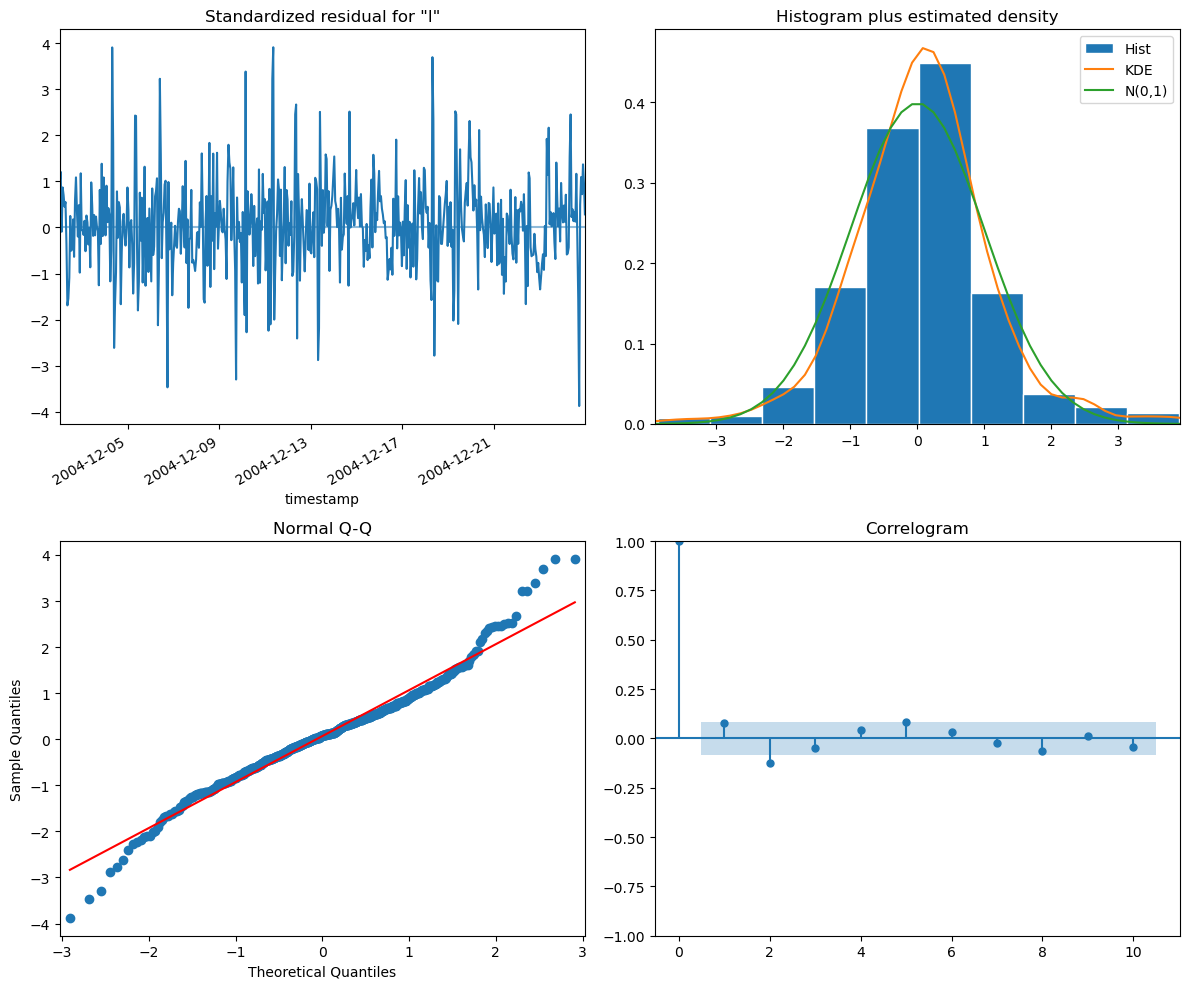

In [166]:
# Diagnostics (for (2,0,2,1))

SARIMA_model = sm.tsa.statespace.SARIMAX(
        load_long_z1_dec04_train["log_load_rs"].asfreq('h'), 
        order=(2,0,0),  # non-seasonal with no differencing
        seasonal_order=(2,1,1,24) # seasonal differencing
        )

SARIMA_model_fit = SARIMA_model.fit(disp=False, maxiter=500)
print(SARIMA_model_fit.aic)
SARIMA_model_fit.plot_diagnostics(figsize=(12,10))
plt.tight_layout()
plt.show()

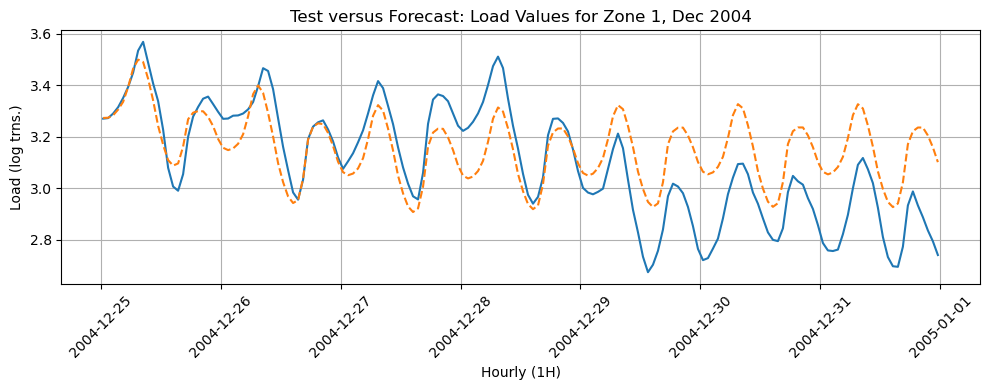

In [167]:
# Predicting 24*7 steps ahead
forecast_dec04 = SARIMA_model_fit.get_forecast(steps=24*7).predicted_mean

# Creating test data
load_long_z1_dec04_test = load_long_z1.loc[(load_long_z1.year == 2004) & (load_long_z1.month == 12),["timestamp","log_load_rs"]]
load_long_z1_dec04_test = load_long_z1_dec04_test.set_index("timestamp")
load_long_z1_dec04_test = load_long_z1_dec04_test['2004-12-25 00:30:00':]
load_long_z1_dec04_test.index = pd.to_datetime(load_long_z1_dec04_test.index)

# Fit on the test data

fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=load_long_z1_dec04_test, x=load_long_z1_dec04_test.index, y=load_long_z1_dec04_test.log_load_rs, ax=ax)
sns.lineplot(forecast_dec04, linestyle = '--')
ax.set_title("Test versus Forecast: Load Values for Zone 1, Dec 2004")
ax.set_xlabel("Hourly (1H)")
ax.set_ylabel("Load (log trns.)")
ax.grid(True)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [168]:
# Performance on test set
print(f"R2 score: {r2_score(load_long_z1_dec04_test.log_load_rs, forecast_dec04)}")
print(f'MSE score: {mean_squared_error(load_long_z1_dec04_test.log_load_rs, forecast_dec04)}')
print(f'MAE score: {mean_absolute_error(load_long_z1_dec04_test.log_load_rs, forecast_dec04)}')
print(f'MAPE score: {mean_absolute_percentage_error(load_long_z1_dec04_test.log_load_rs, forecast_dec04)}')

R2 score: 0.38194382963939366
MSE score: 0.029001421280919287
MAE score: 0.13975505549166134
MAPE score: 0.04663590346491615


Performance is better than ES